<h1 style="color:#007bff;">Milestone 3: Exploratory Data Analysis (EDA)</h1>


<h2 style="color:#007bff;">Title</h2>


In [29]:
from IPython.display import display, Image
# m3_imagen = 'C:/Users/CELESTE/CodeOp/Module_3/EDA-milestone-3/barcelona-3960566_1280.jpg'
#~display(Image(filename=m3_imagen))

### Context

define project focus and relevance.


### Importing Libraries and Loading Dataset

In [2]:
# import all necesary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium

In [90]:
# read & load the dataset into pandas dataframe
df = pd.read_csv("/Users/CELESTE/CodeOp/Module_3/archive/mental_health_dataset.csv")
df



,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


### About the dataset

"This dataset appears to contain a variety of features related to text analysis, sentiment analysis, and psychological indicators, likely derived from posts or text data. Some features include readability indices such as Automated Readability Index (ARI), Coleman Liau Index, and Flesch-Kincaid Grade Level, as well as sentiment analysis scores like sentiment compound, negative, neutral, and positive scores. Additionally, there are features related to psychological aspects such as economic stress, isolation, substance use, and domestic stress. The dataset seems to cover a wide range of linguistic, psychological, and behavioural attributes, potentially suitable for analyzing mental health-related topics in online communities or text data."

The dataset used in this analysis was sourced from https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset. It is important to note that the dataset primarily consists of data from male participants. Therefore, a decision was made to conduct separate analyses for male and female participants to ensure a comprehensive understanding of the data and avoid potential biases.

#### Limitations:

The gender imbalance in the dataset may affect the generalizability of the findings.
It is important to interpret the results with this bias in mind.

In [67]:
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

The Dataset Contains, Rows: 292,364 & Columns: 43


In [69]:
# impacto de la salud mental en el trabajo y la productividad, así como los factores laborales que podrían contribuir a estos problemas

df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


## Starting the analysis

In [91]:
numerical_columns = df.columns[(df.dtypes != 'object').tolist()].tolist()

categorical_columns = df.columns[(df.dtypes == 'object').tolist()].tolist()

print(numerical_columns)
print(categorical_columns)

#Because all columns are categorical values, the following analysis is conducted...

[]
['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']


In [52]:
#separar los valores x gender

# Paso 1: Agrupar el DataFrame por género
gender_groups = df.groupby('Gender')

# Paso 2: Obtener los DataFrames separados para cada género
female_df = gender_groups.get_group('Female')
male_df = gender_groups.get_group('Male')

## EDA for Categorical Variables

Create a separate dataframe which has only Categorical Variables


1. Basic Statistics

In [93]:
df_cat_stats = pd.DataFrame(columns=['column', 'values', 'values_count_incna', 'values_count_nona', 'num_miss'])

tmp = pd.DataFrame()

for c in df.columns:
    tmp['column'] = [c]
    tmp['values'] = [df[c].unique()]
    tmp['values_count_incna'] = len(list(df[c].unique()))
    tmp['values_count_nona'] = int(df[c].nunique())
    tmp['num_miss'] = df[c].isnull().sum()
    df_cat_stats = pd.concat([df_cat_stats, tmp], ignore_index=True)

df_cat_stats


,column,values,values_count_incna,values_count_nona,num_miss
0,Timestamp,"[8/27/2014 11:29, 8/27/2014 11:31, 8/27/2014 1...",580,580,0
1,Gender,"[Female, Male]",2,2,0
2,Country,"[United States, Poland, Australia, Canada, Uni...",35,35,0
3,Occupation,"[Corporate, Student, Business, Housewife, Others]",5,5,0
4,self_employed,"[nan, No, Yes]",3,2,5202
5,family_history,"[No, Yes]",2,2,0
6,treatment,"[Yes, No]",2,2,0
7,Days_Indoors,"[1-14 days, Go out Every day, More than 2 mont...",5,5,0
8,Growing_Stress,"[Yes, No, Maybe]",3,3,0
9,Changes_Habits,"[No, Yes, Maybe]",3,3,0



*Notes*
- Change capital letters 
- Country: have 35 categories
- self_employed: 5202 NaNs
- family_history: 2 cat: 'No' y 'Yes' -> one-hot
- treatment: 2 cat: 'Yes' y 'No' -> one-hot 


In [95]:
# Convertir los nombres de las columnas
df.columns = df.columns.str.title()

In [99]:
# Reemplazar los valores NaN con "Not specified" 
df['Self_Employed'].fillna('Not specified', inplace=True)

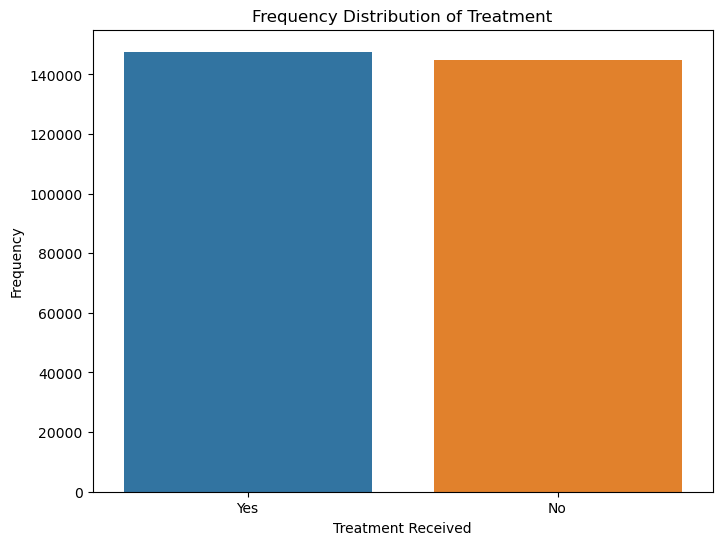

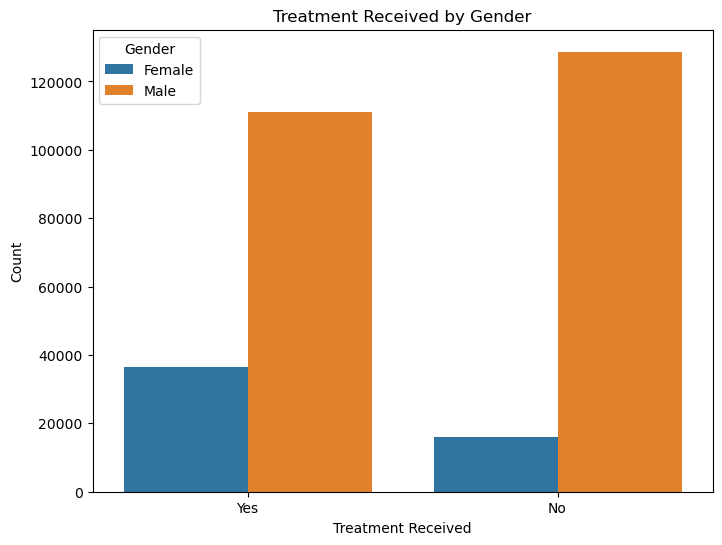

In [104]:

# Paso 1: Seleccionar una variable para analizar
variable_to_analyze = 'Treatment'  # Por ejemplo, 'treatment' indica si una persona recibió tratamiento

# Paso 2: Calcular la distribución de frecuencia de la variable seleccionada
frequency_distribution = df[variable_to_analyze].value_counts()

# Mostrar la distribución de frecuencia en un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frequency_distribution.index, y=frequency_distribution.values)
plt.title('Frequency Distribution of Treatment')
plt.xlabel('Treatment Received')
plt.ylabel('Frequency')
plt.show()

# Paso 3: Explorar la relación entre la variable dependiente y las variables independientes
# Por ejemplo, podrías visualizar la relación entre 'treatment' y 'gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='Treatment', hue='Gender', data=df)
plt.title('Treatment Received by Gender')
plt.xlabel('Treatment Received')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# También podrías explorar la relación entre 'treatment' y otras variables independientes de interés
# Por ejemplo, 'treatment' vs. 'age', 'treatment' vs. 'country', etc.

# Paso 4: Añadir la variable dependiente si aún no está presente
# Si 'treatment' ya está presente como una columna en tu conjunto de datos, no necesitas hacer nada más aquí

# Paso 5: Explorar más la relación entre la variable dependiente y las variables independientes

# Realizar más análisis estadísticos, visualizaciones o pruebas de hipótesis según sea necesario


In [117]:
# In order to visualize the data accurately and without bias, it will be separated into female and male groups, as mentioned earlier.
# 
df_female = df[df['Gender'] == 'Female']
df_male = df[df['Gender'] == 'Male']


In [ ]:

# Crear un pivot table para contar el número de tratamientos recibidos en cada país
pivot_table = df.pivot_table(index='Country', columns='Treatment', aggfunc='size', fill_value=0)

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='d', cbar=True)
plt.title('Treatment Distribution by Country')
plt.xlabel('Treatment Received')
plt.ylabel('Country')
plt.show()



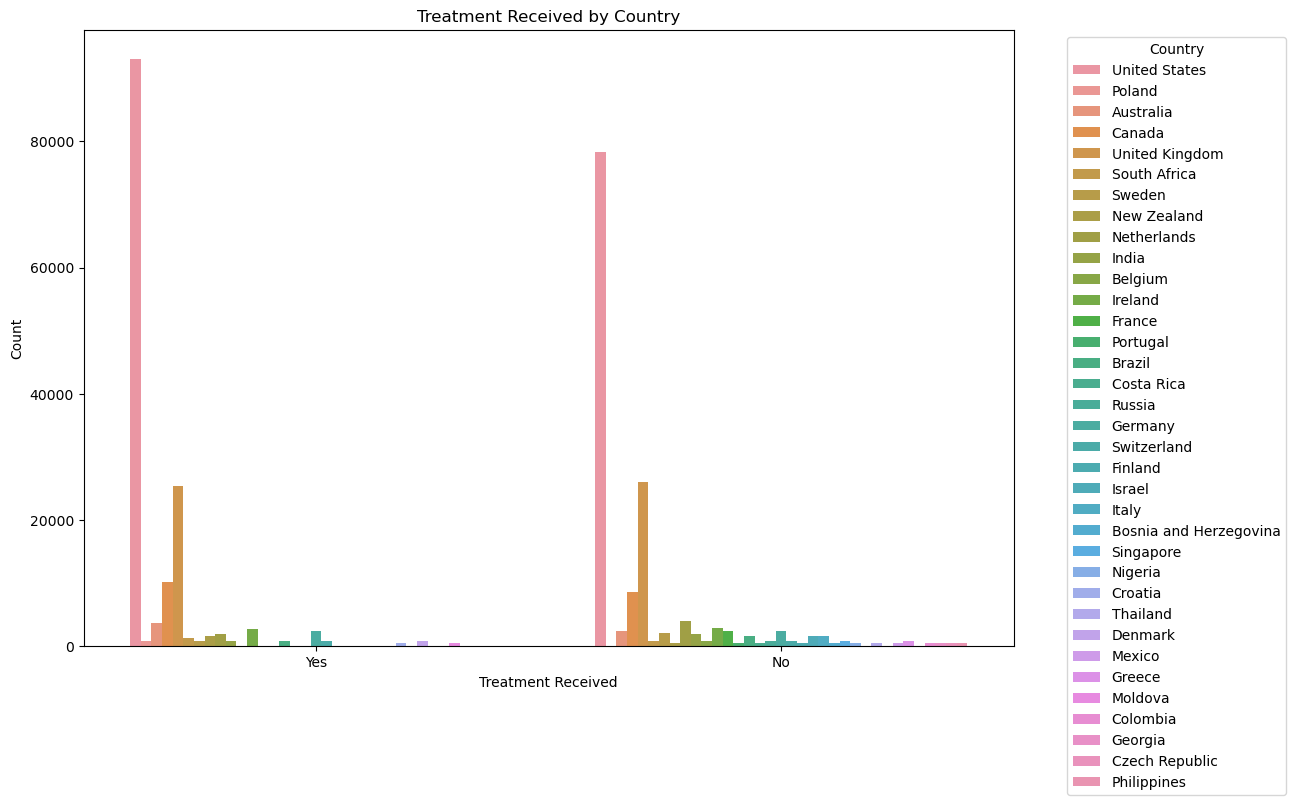

In [113]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la relación entre 'treatment' y 'country'
plt.figure(figsize=(12, 8))
sns.countplot(x='Treatment', hue='Country', data=df)
plt.title('Treatment Received by Country')
plt.xlabel('Treatment Received')
plt.ylabel('Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



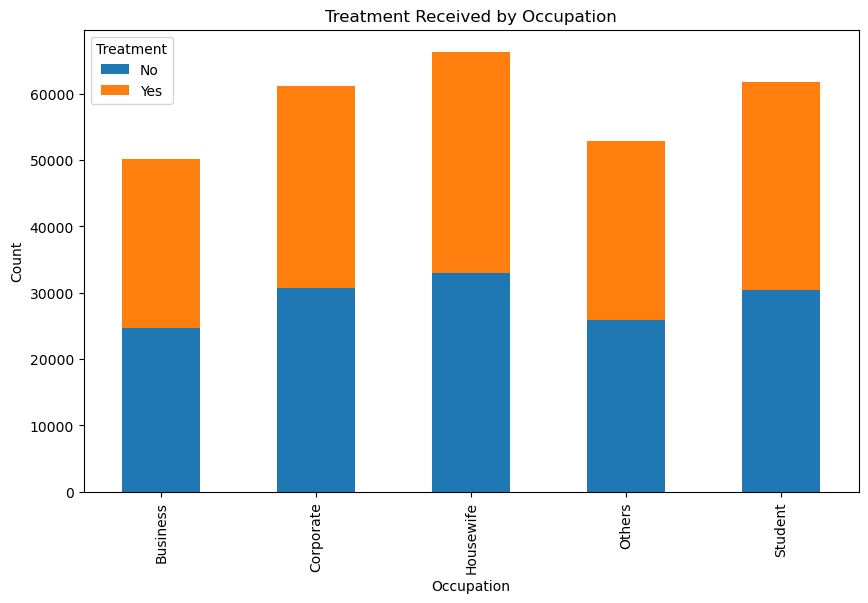

In [116]:

# Visualizar la relación entre 'treatment' y 'occupation' utilizando un gráfico de barras apiladas
occupation_treatment = df.groupby(['Occupation', 'Treatment']).size().unstack()
occupation_treatment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Treatment Received by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()

